# Confronto fra Algoritmi di Ordinamento: Selection-Sort e Merge-Sort
###### Francesco Taccetti - Matricola 7074040

## Introduzione
Un algoritmo di ordinamento è un algoritmo che riordina una sequenza di elementi secondo un criterio prestabilito. Esistono diversi algoritmi di ordinamento, che si differenziano per la complessità computazionale, la stabilità e il tipo di dati che possono gestire. Nel nostro caso andremo ad analizzare il comportamento in varie situazioni di due possibili soluzioni al problema di ordinamento, vale a dire Selection-Sort e Merge-Sort.

## Selection-Sort
L'algoritmo di Selection Sort è un metodo per ordinare una lista di elementi confrontando e scambiando tra loro i valori più piccoli o più grandi (nel nostro caso i più piccoli). Il funzionamento dell'algoritmo è il seguente:

- Si parte dal primo elemento della lista e si cerca il valore minimo tra tutti gli elementi successivi.
- Si scambia il valore minimo trovato con il primo elemento della lista, ponendolo così nella sua posizione definitiva.
- Si ripete il procedimento a partire dal secondo elemento della lista, poi dal terzo e così via fino a raggiungere l'ultimo elemento.

L'algoritmo richiede n-1 passaggi per ordinare una lista di n elementi, dove a ogni passaggio si effettua un solo scambio e n-i confronti, dove i è il numero del passaggio corrente. La complessità temporale dell'algoritmo è quindi θ(n^2) nel caso peggiore, medio e migliore. La complessità spaziale è invece O(1), in quanto l'algoritmo opera in place senza richiedere spazio ausiliario.

Di seguito l'implementazione del codice:

In [24]:
def SelectionSort(A):
    n = len(A)
    for i in range(n):
        minimum = i
        for j in range(i + 1, n):
            if A[j] < A[minimum]:
                minimum = j
        A[i], A[minimum] = A[minimum], A[i] #Effettuo lo scambio fra A[i] e A[minimum]

In [25]:
#Esempio applicativo
A = [4,2,8,5,1,3]
SelectionSort(A)
print(A)

[1, 2, 3, 4, 5, 8]


## Merge-Sort
L'algoritmo di Merge-Sort è invece un metodo di ordinamento basato sul principio di divide - impera - combina. L'idea è di dividere ricorsivamente il vettore da ordinare in due sottovettori di dimensione approssimativamente uguale, fino a ottenere sottovettori di lunghezza unitaria o nulla, che sono già ordinati per definizione. Poi si fondono i sottovettori ordinati in un unico vettore ordinato, utilizzando una procedura ausiliaria che confronta gli elementi dei due sottovettori e li inserisce in ordine nel vettore finale (Merge).

Riguardo il costo computazionale occorre riflettere sul fatto che a ogni livello di ricorsione si effettua una divisione del vettore in due parti e una fusione dei due sottovettori ordinati, che richiedono entrambe un tempo lineare θ(n). Il numero di livelli di ricorsione è logaritmico in base 2, poiché a ogni livello si dimezza la dimensione del vettore, quindi il costo totale è dato dal prodotto tra il numero di livelli e il costo per livello, ovvero θ(n log n), il che lo rende un ordinamento per confronto asintoticamente ottimo.

Una sua possibile implementazione è la seguente:

In [26]:
import sys
inf = sys.maxsize

def MergeSort(A, p, r):
    if p < r:
        q = (p + r) // 2            #Divide
        MergeSort(A, p, q)          #Impera
        MergeSort(A, q + 1, r)      #Impera
        Merge(A, p, q, r)           #Combina


def Merge(A, p, q, r):
    L = np.array(A[p:q + 1])
    R = np.array(A[q + 1:r + 1])
    L = np.append(L, inf)
    R = np.append(R, inf)
    i = 0
    j = 0
    for k in range(p, r + 1):
        if L[i] <= R[j]:
            A[k] = L[i]
            i += 1
        else:
            A[k] = R[j]
            j += 1

In [27]:
#Esempio applicativo
A = [4,2,8,5,1,3]
MergeSort(A,0,len(A)-1)
print(A)

[1, 2, 3, 4, 5, 8]


## Descrizione dei Test
Per mettere alla prova le prestazioni dei due algoritmi effettueremo dei test che andranno ad analizzare il loro comportamento di fronte a diversi tipi di input di dimensioni diverse.

Ci serviremo dunque di una funzione che avrà il compito di generare dei grafici che mostrino l'andamento asintotico degli algoritmi di ordinamento.
La funzione prende in ingresso diversi parametri:
- _algType_ indica su quale algoritmo viene eseguito il test (0 per il Selection-Sort, 1 per il Merge-Sort);
- _insertType_ indica il metodo di inserimento dei valori (0 per quello sequenziale, 1 per quello casuale);
- _arrayDim_ rappresenta la dimensione massima dell'array su cui eseguiamo il test;
- _plot_ è un booleano che serve per decidere di stampare subito i risultati o salvarli per utilizzarli in un secondo momento.

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import time
import random

def plotSortGraph(algType, insertType, arrayDim, plot=True):
    x, y = [], []
    for i in range(1, arrayDim):
        x.append(i)
        A = np.arange(i) if insertType == 0 else random.sample(range(i), i)
        if algType == 0:
            start = time.perf_counter()
            SelectionSort(A)
            end = time.perf_counter()
        else:
            start = time.perf_counter()
            MergeSort(A, 0, len(A) - 1)
            end = time.perf_counter()
        z = y[-1] if (len(y) != 0) else 0
        y.append((end - start) / i + z)
    if plot:
        plt.plot(x, y)
        title = 'Selection-Sort' if algType == 0 else 'Merge-Sort'
        title += ' on Ordered List ' if insertType == 0 else ' on Randomized List '
        title += str(arrayDim)
        plt.title(title)
        plt.show()
    else:
        return x, y

Effettuiamo ora i test nei casi in cui _arrayDim_ sia uguale a 50, 100, 300 e 500:

# 50

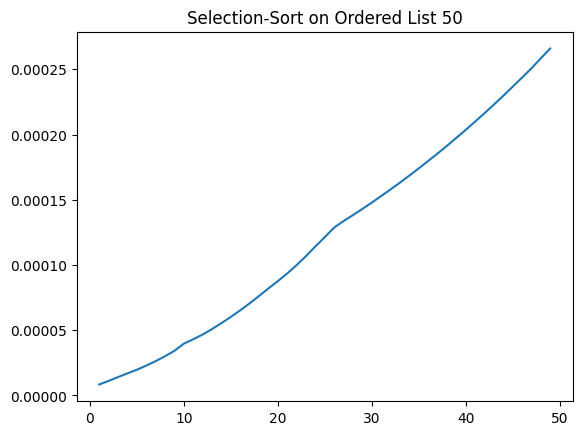

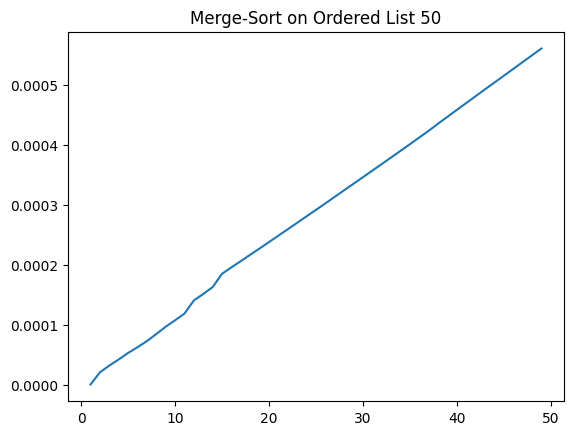

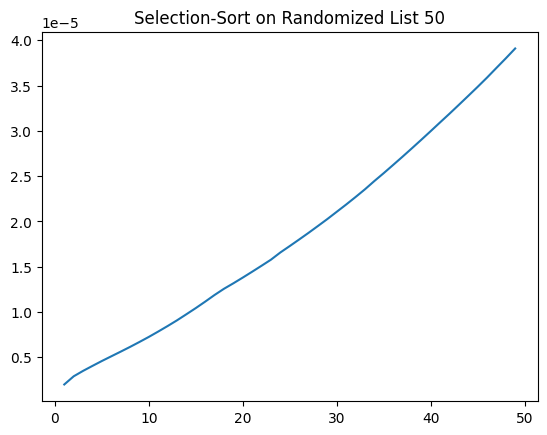

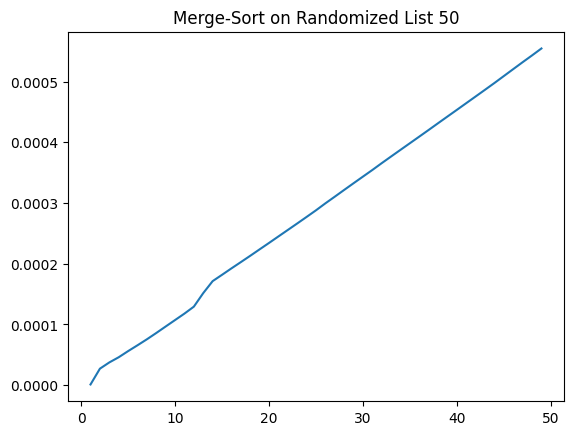

[[None, None], [None, None]]

In [41]:
[[plotSortGraph(i, j, 50) for i in range(2)] for j in range(2)]

# 100

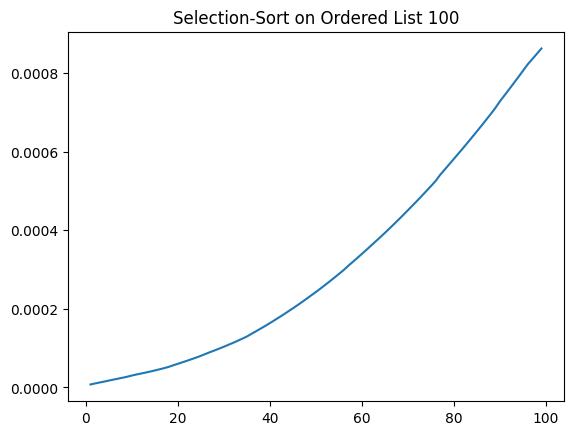

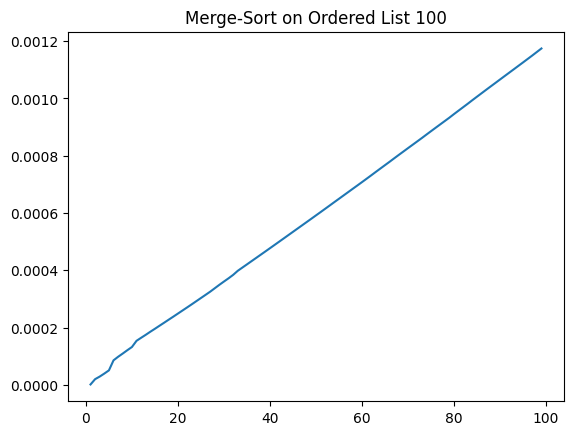

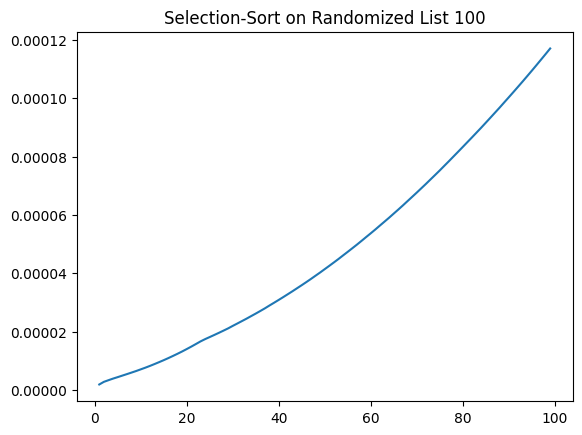

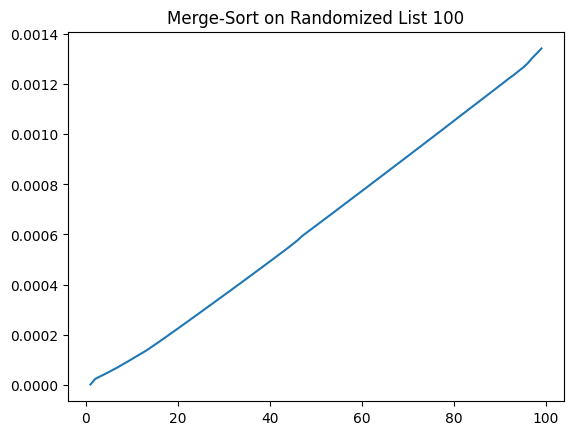

[[None, None], [None, None]]

In [42]:
[[plotSortGraph(i, j, 100) for i in range(2)] for j in range(2)]

# 300

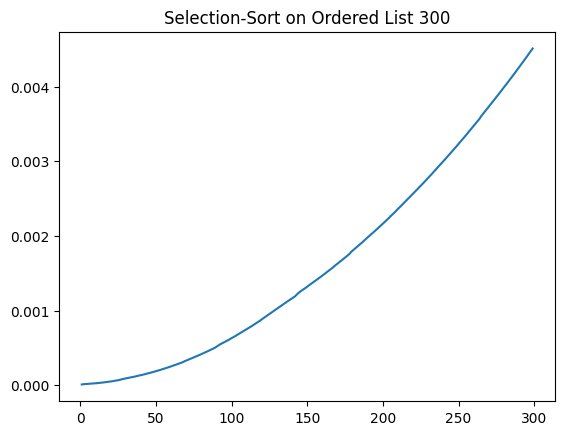

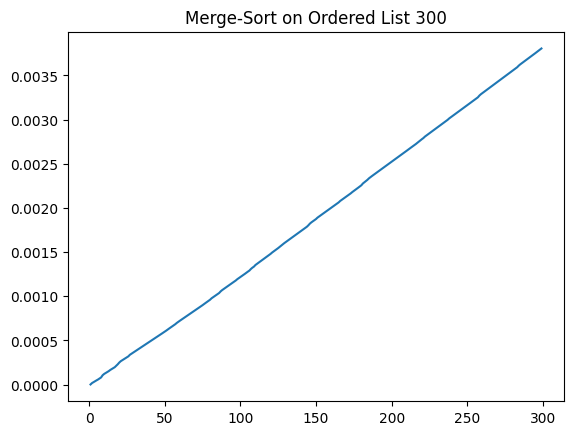

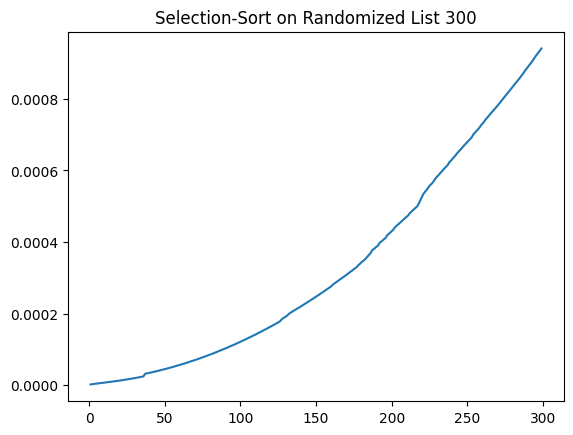

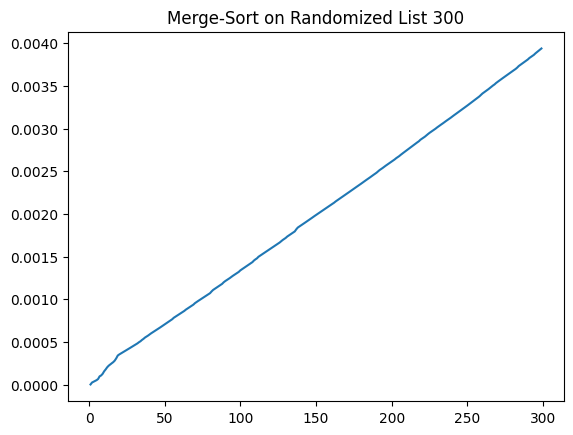

[[None, None], [None, None]]

In [31]:
[[plotSortGraph(i, j, 300) for i in range(2)] for j in range(2)]

# 500

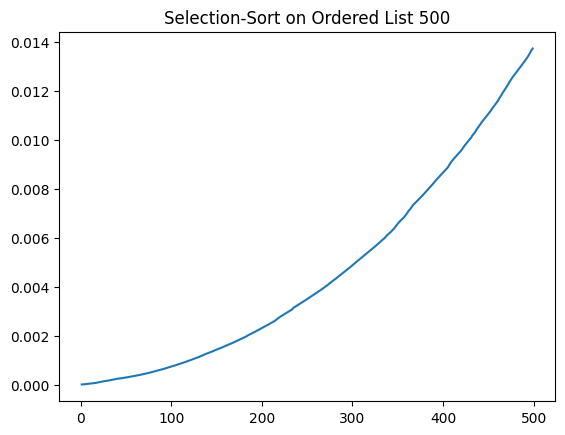

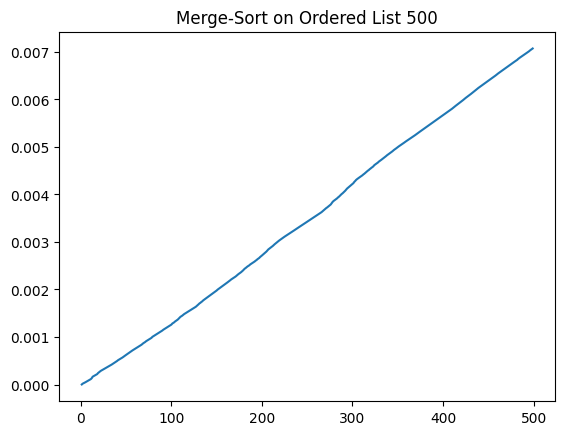

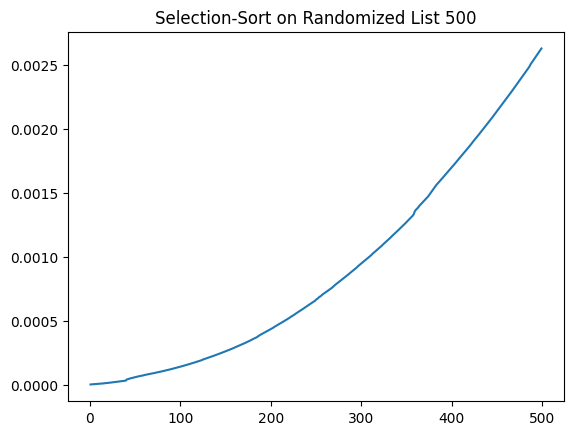

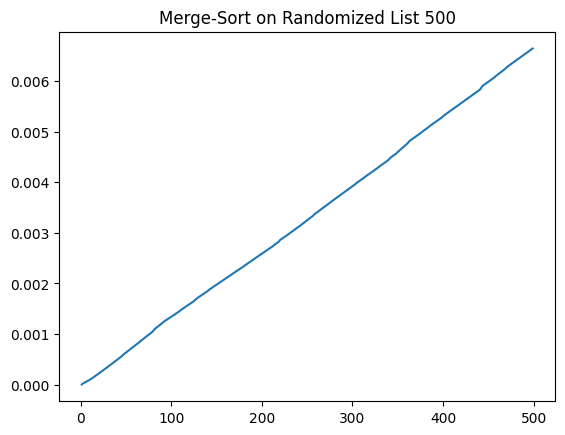

[[None, None], [None, None]]

In [32]:
[[plotSortGraph(i, j, 500) for i in range(2)] for j in range(2)]

In tutti i e quattro i casi si può chiaramente vedere come la complessità dell'algoritmo di Selection-Sort sia quadratica, ovvero θ(n^2), mentre quella dell'algoritmo di Merge-Sort risulta uguale a θ(n*lg(n)).
Osserviamo inoltre che le prestazioni di entrambi gli algoritmi non presentano particolari differenze sia nel caso in cui la lista in ingresso è già ordinata, sia in quello in cui l'ordine degli elementi è casuale; questo conferma quanto già detto in precedenza riguardo l'assenza di una reale distinzione fra un caso peggiore e uno migliore per entrambi gli algoritimi.

Appurato il fatto che osservare il comportamento degli algoritmi in realzione a uno o l'altro tipo di inserimento è indifferente, procediamo a stampare un grafico che ci permetta di confrontare direttamente le prestazioni dei due diversi approcci ponendo _insertType_ = 0 (quindi liste in ingresso già ordinate) e _arrayDim_ = 500.

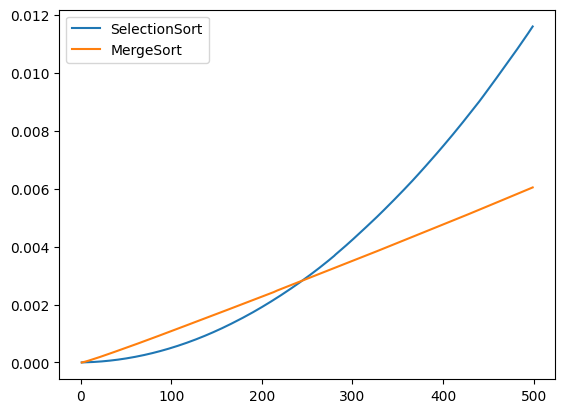

In [37]:
plt.plot(plotSortGraph(0, 0, 500, False)[0], plotSortGraph(0, 0, 500, False)[1], label='SelectionSort')
plt.plot(plotSortGraph(1, 0, 500, False)[0], plotSortGraph(1, 0, 500, False)[1], label='MergeSort')
plt.legend()
plt.show()